# Example with Sensitivity Analysis

Basic: 
```python
method_name="add_unobserved_common_cause"
```

In [62]:
# Imports
import pandas as pd
from dowhy import CausalModel
import warnings
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import networkx as nx

warnings.filterwarnings("ignore", category=FutureWarning)

## Trying out on [Balke-Pearl](https://drive.google.com/drive/folders/1mLHLrXJI1-z0eMy68Bkljw4gdDImSm0q) example

### Data and Modeling

In [2]:
df = pd.read_csv("../../data/balke_pearl.csv")
df.head()

,Z,X,Y
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


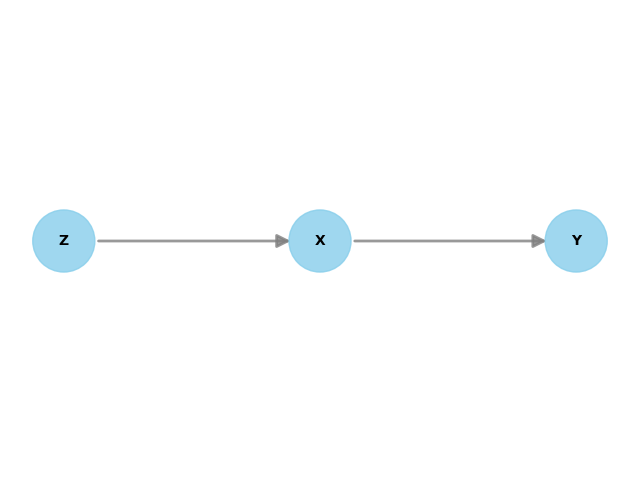

In [3]:
# Step 1: Model
model = CausalModel(
    data=df,
    treatment='X',
    outcome='Y',
    instruments=['Z']
)

model.view_model()

### Identifying

In [4]:
# Step 2: Identify
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand)

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
 d        
────(E[Y])
d[X]      
Estimand assumption 1, Unconfoundedness: If U→{X} and U→Y then P(Y|X,,U) = P(Y|X,)

### Estimand : 2
Estimand name: iv
Estimand expression:
 ⎡                   -1⎤
 ⎢ d      ⎛ d       ⎞  ⎥
E⎢────(Y)⋅⎜────([X])⎟  ⎥
 ⎣d[Z]    ⎝d[Z]     ⎠  ⎦
Estimand assumption 1, As-if-random: If U→→Y then ¬(U →→{Z})
Estimand assumption 2, Exclusion: If we remove {Z}→{X}, then ¬({Z}→Y)

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



### Estimation

In [5]:
# Step 3: Estimate
# Choose the first estimand: using the backdoor criterion
estimate = model.estimate_effect(
    identified_estimand,
    method_name="backdoor.linear_regression",
    test_significance=True,
    confidence_intervals=True
)

print(estimate)

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
 d        
────(E[Y])
d[X]      
Estimand assumption 1, Unconfoundedness: If U→{X} and U→Y then P(Y|X,,U) = P(Y|X,)

## Realized estimand
b: Y~X
Target units: ate

## Estimate
Mean value: 0.23544231631810425
p-value: [6.2290416e-14]
95.0% confidence interval: [[0.17474776 0.29613687]]



### Refutation

#### Linear

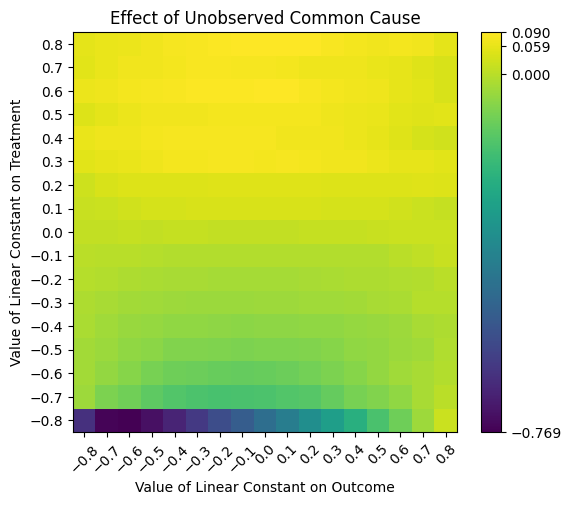

In [44]:
# Step 4: Refute (sensitivity analysis)
strength_list = np.arange(-0.8, 0.9, 0.1).round(1)

ref = model.refute_estimate(
    identified_estimand,
    estimate,
    method_name="add_unobserved_common_cause",
    confounders_effect_on_treatment="linear",
    confounders_effect_on_outcome="linear",
    effect_strength_on_treatment=strength_list,
    effect_strength_on_outcome=strength_list
)

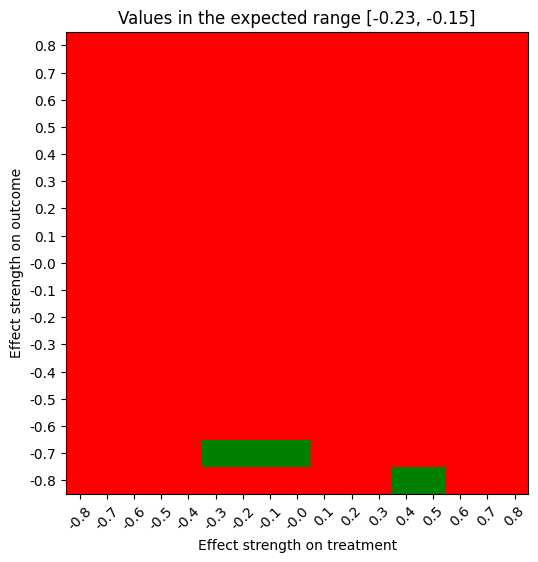

In [59]:
# Find values in the range [-0.23, -0.15]
matrix = ref.new_effect_array
values_in_range = np.where((matrix >= -0.23) & (matrix <= -0.15))
matrix[values_in_range] = 1
matrix[matrix != 1] = 0
matrix = matrix[::-1]

# Create a binary heatmap
plt.figure(figsize=(6, 6))
plt.imshow(matrix, cmap=ListedColormap(
    ['red', 'green']), interpolation='nearest')

# Set ticks and labels
plt.xticks(ticks=np.arange(len(strength_list)),
           labels=strength_list, rotation=45)
plt.yticks(ticks=np.arange(len(strength_list)),
           labels=strength_list[::-1])

# Set title
plt.title('Values in the expected range [-0.23, -0.15]')
plt.xlabel('Effect strength on treatment')
plt.ylabel('Effect strength on outcome')

# Show the plot
plt.show()

#### Binary Flip

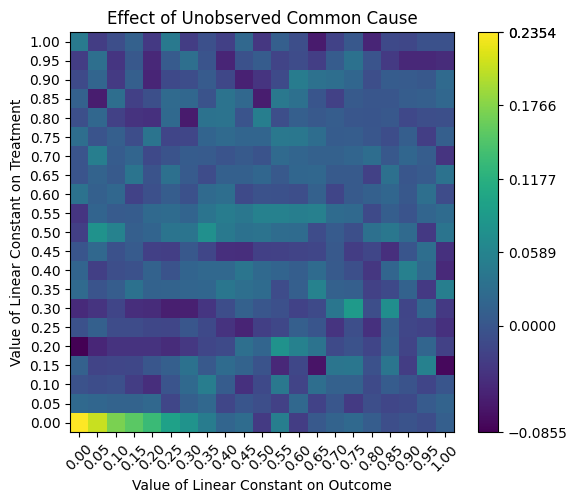

In [60]:
# Step 4: Refute (sensitivity analysis)
strength_list = np.arange(0, 1.05, 0.05).round(2)

ref = model.refute_estimate(
    identified_estimand,
    estimate,
    method_name="add_unobserved_common_cause",
    confounders_effect_on_treatment="binary_flip",
    confounders_effect_on_outcome="binary_flip",
    effect_strength_on_treatment=strength_list,
    effect_strength_on_outcome=strength_list
)

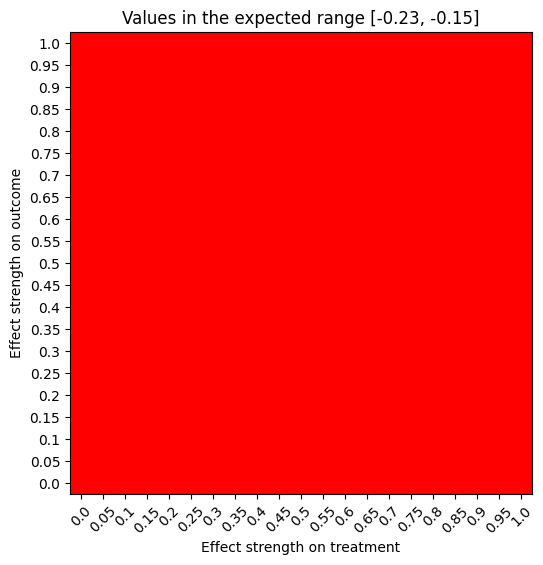

In [61]:
# Find values in the range [-0.23, -0.15]
matrix = ref.new_effect_array
values_in_range = np.where((matrix >= -0.23) & (matrix <= -0.15))
matrix[values_in_range] = 1
matrix[matrix != 1] = 0
matrix = matrix[::-1]

# Create a binary heatmap
plt.figure(figsize=(6, 6))
plt.imshow(matrix, cmap=ListedColormap(
    ['red', 'green']), interpolation='nearest')

# Set ticks and labels
plt.xticks(ticks=np.arange(len(strength_list)),
           labels=strength_list, rotation=45)
plt.yticks(ticks=np.arange(len(strength_list)),
           labels=strength_list[::-1])

# Set title
plt.title('Values in the expected range [-0.23, -0.15]')
plt.xlabel('Effect strength on treatment')
plt.ylabel('Effect strength on outcome')

# Show the plot
plt.show()

## Trying out a more complex example example

### Data and Modeling

In [ ]:
# Graphical representation of the causal model
graph = nx.DiGraph(
    """
    
    """
)

In [ ]:
# Data
df = pd.read_csv("../../data/balke_pearl.csv")
df.head()

,Z,X,Y
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


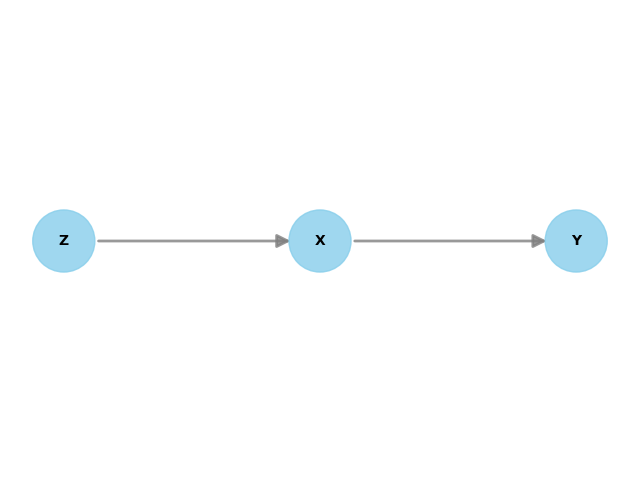

In [ ]:
# Step 1: Model
model = CausalModel(
    data=df,
    treatment='X',
    outcome='Y',
    instruments=['Z']
)

model.view_model()

### Identifying

In [ ]:
# Step 2: Identify
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand)

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
 d        
────(E[Y])
d[X]      
Estimand assumption 1, Unconfoundedness: If U→{X} and U→Y then P(Y|X,,U) = P(Y|X,)

### Estimand : 2
Estimand name: iv
Estimand expression:
 ⎡                   -1⎤
 ⎢ d      ⎛ d       ⎞  ⎥
E⎢────(Y)⋅⎜────([X])⎟  ⎥
 ⎣d[Z]    ⎝d[Z]     ⎠  ⎦
Estimand assumption 1, As-if-random: If U→→Y then ¬(U →→{Z})
Estimand assumption 2, Exclusion: If we remove {Z}→{X}, then ¬({Z}→Y)

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



### Estimation

In [ ]:
# Step 3: Estimate
# Choose the first estimand: using the backdoor criterion
estimate = model.estimate_effect(
    identified_estimand,
    method_name="backdoor.linear_regression",
    test_significance=True,
    confidence_intervals=True
)

print(estimate)

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
 d        
────(E[Y])
d[X]      
Estimand assumption 1, Unconfoundedness: If U→{X} and U→Y then P(Y|X,,U) = P(Y|X,)

## Realized estimand
b: Y~X
Target units: ate

## Estimate
Mean value: 0.23544231631810425
p-value: [6.2290416e-14]
95.0% confidence interval: [[0.17474776 0.29613687]]



### Refutation

#### Linear

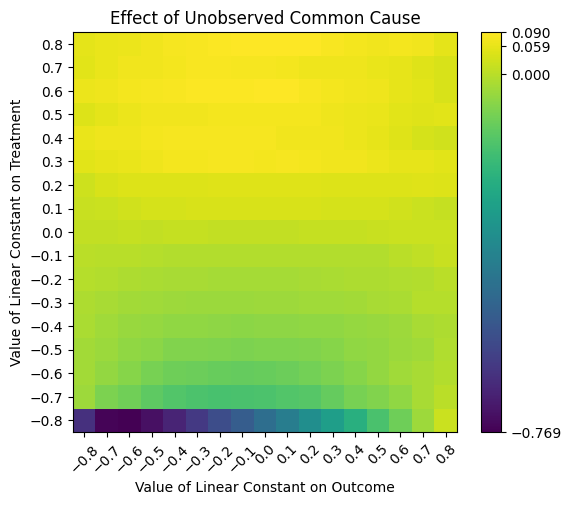

In [ ]:
# Step 4: Refute (sensitivity analysis)
strength_list = np.arange(-0.8, 0.9, 0.1).round(1)

ref = model.refute_estimate(
    identified_estimand,
    estimate,
    method_name="add_unobserved_common_cause",
    confounders_effect_on_treatment="linear",
    confounders_effect_on_outcome="linear",
    effect_strength_on_treatment=strength_list,
    effect_strength_on_outcome=strength_list
)

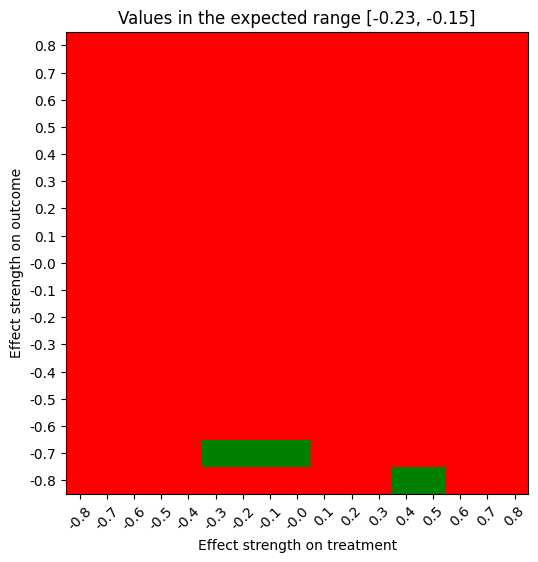

In [ ]:
# Find values in the range [-0.23, -0.15]
matrix = ref.new_effect_array
values_in_range = np.where((matrix >= -0.23) & (matrix <= -0.15))
matrix[values_in_range] = 1
matrix[matrix != 1] = 0
matrix = matrix[::-1]

# Create a binary heatmap
plt.figure(figsize=(6, 6))
plt.imshow(matrix, cmap=ListedColormap(
    ['red', 'green']), interpolation='nearest')

# Set ticks and labels
plt.xticks(ticks=np.arange(len(strength_list)),
           labels=strength_list, rotation=45)
plt.yticks(ticks=np.arange(len(strength_list)),
           labels=strength_list[::-1])

# Set title
plt.title('Values in the expected range [-0.23, -0.15]')
plt.xlabel('Effect strength on treatment')
plt.ylabel('Effect strength on outcome')

# Show the plot
plt.show()

#### Binary Flip

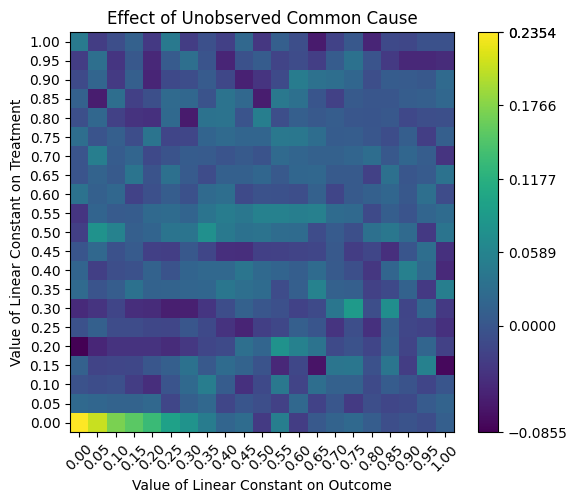

In [ ]:
# Step 4: Refute (sensitivity analysis)
strength_list = np.arange(0, 1.05, 0.05).round(2)

ref = model.refute_estimate(
    identified_estimand,
    estimate,
    method_name="add_unobserved_common_cause",
    confounders_effect_on_treatment="binary_flip",
    confounders_effect_on_outcome="binary_flip",
    effect_strength_on_treatment=strength_list,
    effect_strength_on_outcome=strength_list
)

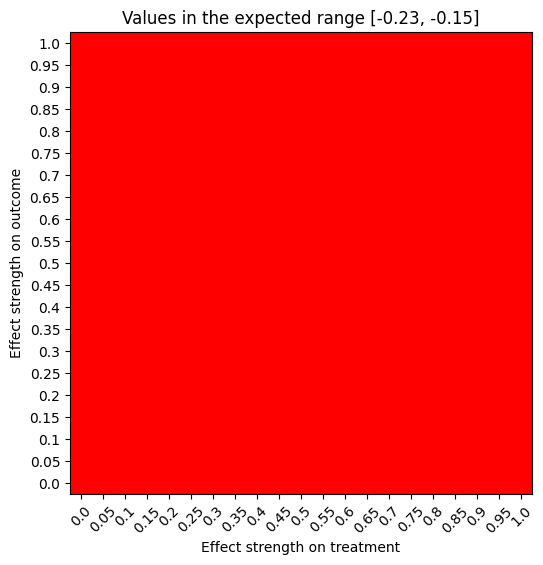

In [ ]:
# Find values in the range [-0.23, -0.15]
matrix = ref.new_effect_array
values_in_range = np.where((matrix >= -0.23) & (matrix <= -0.15))
matrix[values_in_range] = 1
matrix[matrix != 1] = 0
matrix = matrix[::-1]

# Create a binary heatmap
plt.figure(figsize=(6, 6))
plt.imshow(matrix, cmap=ListedColormap(
    ['red', 'green']), interpolation='nearest')

# Set ticks and labels
plt.xticks(ticks=np.arange(len(strength_list)),
           labels=strength_list, rotation=45)
plt.yticks(ticks=np.arange(len(strength_list)),
           labels=strength_list[::-1])

# Set title
plt.title('Values in the expected range [-0.23, -0.15]')
plt.xlabel('Effect strength on treatment')
plt.ylabel('Effect strength on outcome')

# Show the plot
plt.show()